## Homework #6


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
df = pd.read_csv("jamb_exam_results.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)
for c in string_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")
    
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
student_id                        int64
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [216]:
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,public,public,public,public,public
school_location,urban,rural,rural,urban,urban
extra_tutorials,yes,no,yes,no,no
access_to_learning_materials,yes,yes,yes,yes,yes
parent_involvement,high,high,high,medium,medium


In [217]:
for column in list(df.dtypes.index):
    print()
    print(column, " ", df[column].dtype)
    print(f"", df[column].nunique())
    print(f"", df[column].unique())


jamb_score   int64
 220
 [192 207 182 210 199 202 251 129 220 157 188 158 191 114 146 154 102 106
 238 274 108 159 263 149 101 153 267 133 147 177 239 181 123 140 144 206
 100 223 266 134 104 172 222 136 185 164 113 189 262 231 151 103 122 135
 170 141 156 227 143 161 226 176 169 196 243 138 155 298 236 201 131 116
 197 110 115 228 225 118 232 215 200 211 218 171 183 245 160 119 107 221
 150 126 120 127 247 234 105 145 198 162 166 224 132 283 121 241 204 229
 268 111 244 163 246 295 168 184 179 190 142 212 299 180 249 128 208 195
 112 216 194 152 117 139 165 130 173 277 240 124 137 281 235 219 282 148
 125 250 255 280 193 174 237 178 254 187 256 167 270 230 109 308 175 214
 285 209 292 279 213 186 261 259 291 278 293 264 275 252 253 217 301 233
 260 271 205 242 294 272 203 276 342 289 269 248 320 346 360 257 366 367
 343 322 258 286 359 290 296 297 288 273 284 265 319 287 304 317 328 362
 335 323 329 355]

study_hours_per_week   int64
 41
 [22 14 29 12 25 35 27 23 15 32  7  2 16 18 40

In [218]:
del df["student_id"]

df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,public,public,public,public,public
school_location,urban,rural,rural,urban,urban
extra_tutorials,yes,no,yes,no,no
access_to_learning_materials,yes,yes,yes,yes,yes
parent_involvement,high,high,high,medium,medium


In [219]:
df.parent_education_level = df.parent_education_level.fillna(0)
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [220]:
from sklearn.model_selection import train_test_split

random_state = 1
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)

df.shape[0], df_train.shape[0] + df_test.shape[0] + df_val.shape[0]

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.jamb_score.values
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_full_train["jamb_score"]
del df_train["jamb_score"]
del df_val["jamb_score"]
del df_test["jamb_score"]


In [85]:
from sklearn.feature_extraction import DictVectorizer

## Question 1

Let's train a decision tree regressor to predict the jamb_score variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

- study_hours_per_week
- attendance_rate
- teacher_quality
- distance_to_school

In [86]:
from sklearn.tree import DecisionTreeRegressor, export_text

max_depth = 1
dicts = df_train.to_dict(orient="records")
dv = DictVectorizer(sparse=True)
X = dv.fit_transform(dicts)
model = DecisionTreeRegressor(max_depth=max_depth)
model.fit(X, y_train)

print(export_text(model, feature_names=dv.get_feature_names_out()))

# Answer is `study_hours_per_week`

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



## Question 2

Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

- 22.13
- 42.13
- 62.13
- 82.12

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [144]:
n_estimators = 10
random_state = 1
n_jobs = -1


def train_random_forest(df, y_train, n_estimators, random_state, n_jobs, max_depth=None):
    dicts = df.to_dict(orient="records")
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(dicts)
    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        random_state=random_state, 
        max_depth=max_depth,
        n_jobs=n_jobs)
    model.fit(X_train, y_train)
    return dv, model


def predict_random_forest(df, dv, model):
    dicts = df.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict(X)
    return y_pred


dv, model = train_random_forest(df_train, y_train, n_estimators, random_state, n_jobs)
y_pred = predict_random_forest(df_val, dv, model)
y_pred
round(root_mean_squared_error(y_val, y_pred), 2)

# Answer is `42.13`


42.14

## Question 3

Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [117]:
random_state = 1
rmses = []
for n in range(10, 201, 10):
    dv, model = train_random_forest(df_train, y_train, n, random_state, n_jobs)
    y_pred = predict_random_forest(df_val, dv, model)
    y_pred
    rmse = round(root_mean_squared_error(y_val, y_pred), 3)
    rmses.append((n, rmse))

rmses    

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


[(10, 42.137),
 (20, 41.461),
 (30, 41.106),
 (40, 40.917),
 (50, 40.852),
 (60, 40.784),
 (70, 40.677),
 (80, 40.539),
 (90, 40.504),
 (100, 40.517),
 (110, 40.593),
 (120, 40.625),
 (130, 40.651),
 (140, 40.595),
 (150, 40.597),
 (160, 40.604),
 (170, 40.628),
 (180, 40.641),
 (190, 40.631),
 (200, 40.601)]

In [118]:
df_rmse = pd.DataFrame(rmses, columns=["n_estimators", "rmse"])
df_rmse

,n_estimators,rmse
0,10,42.137
1,20,41.461
2,30,41.106
3,40,40.917
4,50,40.852
5,60,40.784
6,70,40.677
7,80,40.539
8,90,40.504
9,100,40.517


In [119]:
idmin = df_rmse.rmse.idxmin()
min_rmse_n = df_rmse.iloc[idmin].n_estimators
min_rmse = round(df_rmse.iloc[idmin].rmse, 3)
min_rmse_n

90.0

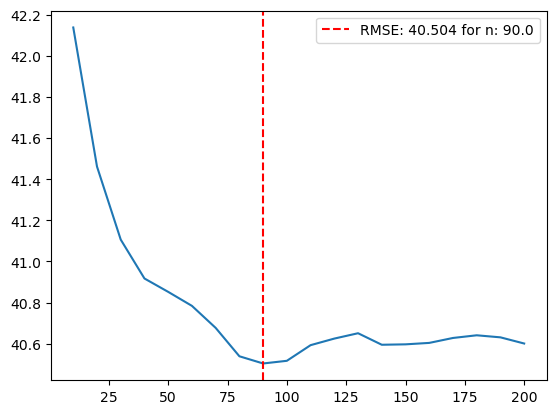

In [120]:
plt.plot(df_rmse.n_estimators, df_rmse.rmse)
plt.axvline(x=min_rmse_n, color='red', linestyle="--", label=f"RMSE: {min_rmse} for n: {min_rmse_n}")
plt.legend()

# Answer is `80`

## Question 4

Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
  - try different values of n_estimators from 10 till 200 (with step 10)
  - calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

- 10
- 15
- 20
- 25

In [235]:
n_jobs = -1
random_state = 1
depths = [10, 15, 20, 25]
n_estimators = range(10, 201, 10)

rmses = []
mean_rmse_per_depth = []
for max_depth in depths:        
    rmse_for_depth = []
    for n in n_estimators:        
        dv, model = train_random_forest(
            df_train, 
            y_train, 
            n_estimators=n, 
            random_state=random_state, 
            n_jobs=n_jobs, 
            max_depth=max_depth
        )
        y_pred = predict_random_forest(df_val, dv, model)
        y_pred
        rmse = root_mean_squared_error(y_val, y_pred)
        rmses.append((n, max_depth, rmse))
        rmse_for_depth.append(rmse)

    mean_rmse = np.mean(rmse_for_depth)
    mean_rmse_per_depth.append((max_depth, mean_rmse))

rmses

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


[(10, 10, 41.25834864835254),
 (20, 10, 40.88052845942386),
 (30, 10, 40.62495594199098),
 (40, 10, 40.270069249393075),
 (50, 10, 40.31700620909737),
 (60, 10, 40.27703523312143),
 (70, 10, 40.285211180892674),
 (80, 10, 40.21030547138022),
 (90, 10, 40.17389971253662),
 (100, 10, 40.25049014290326),
 (110, 10, 40.286316340858086),
 (120, 10, 40.31532362946843),
 (130, 10, 40.32896060681657),
 (140, 10, 40.29975736944223),
 (150, 10, 40.314326720921464),
 (160, 10, 40.354350211250896),
 (170, 10, 40.36008523133161),
 (180, 10, 40.36419635538415),
 (190, 10, 40.35378105367314),
 (200, 10, 40.32501201024063),
 (10, 15, 42.00397868031699),
 (20, 15, 41.45569853039702),
 (30, 15, 41.16757778438639),
 (40, 15, 40.93059314455314),
 (50, 15, 40.78296985463419),
 (60, 15, 40.72417038106091),
 (70, 15, 40.68941491678856),
 (80, 15, 40.53374870557792),
 (90, 15, 40.49668495181916),
 (100, 15, 40.50481195622743),
 (110, 15, 40.53081914942964),
 (120, 15, 40.58023582410237),
 (130, 15, 40.5578083

In [241]:
mean_rmse_per_depth

[(10, 40.39249798892396),
 (15, 40.73528172486332),
 (20, 40.739734321829275),
 (25, 40.78786565962805)]

In [125]:
df_rmse_with_depth = pd.DataFrame(rmses, columns=["n_estimators", "depth", "rmse"])
df_rmse_with_depth

,n_estimators,depth,rmse
0,10,10,41.258
1,20,10,40.881
2,30,10,40.625
3,40,10,40.270
4,50,10,40.317
...,...,...,...
75,160,25,40.600
76,170,25,40.624
77,180,25,40.639
78,190,25,40.629


In [242]:
import seaborn as sns

df_pivotal = pd.pivot(
    df_rmse_with_depth,
    columns="depth",
    index=["n_estimators"], 
    values=["rmse"]
)
df_pivotal

rmse                        
depth             10      15      20      25
n_estimators                                
10            41.258  42.004  42.025  42.160
20            40.881  41.456  41.389  41.471
30            40.625  41.168  41.116  41.125
40            40.270  40.931  40.847  40.934
50            40.317  40.783  40.809  40.867
60            40.277  40.724  40.784  40.797
70            40.285  40.689  40.654  40.687
80            40.210  40.534  40.515  40.548
90            40.174  40.497  40.493  40.513
100           40.250  40.505  40.518  40.522
110           40.286  40.531  40.573  40.592
120           40.315  40.580  40.590  40.620
130           40.329  40.558  40.589  40.646
140           40.300  40.520  40.536  40.591
150           40.314  40.529  40.537  40.593
160           40.354  40.523  40.550  40.600
170           40.360  40.534  40.564  40.624
180           40.364  40.547  40.575  40.639
190           40.354  40.550  40.582  40.629
200           40.325  40.544  40.548  40.599

In [243]:
mean_rmse_per_depth = df_pivotal.mean(axis=0).round(3)
mean_rmse_per_depth

      depth
rmse  10       40.392
      15       40.735
      20       40.740
      25       40.788
dtype: float64

<Axes: xlabel='None-depth', ylabel='n_estimators'>

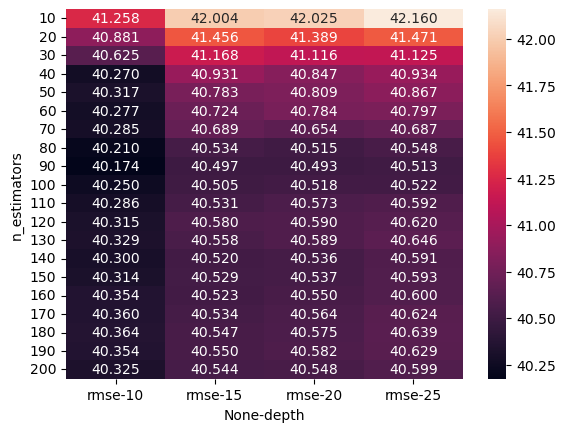

In [230]:
sns.heatmap(df_pivotal, annot=True, fmt=".3f")

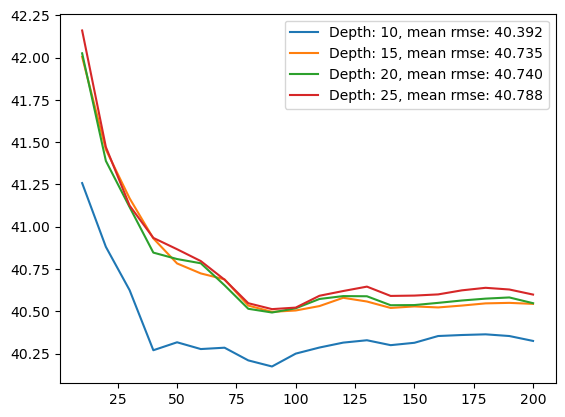

In [247]:
for d in depths:    
    df_subset = df_rmse_with_depth[df_rmse_with_depth.depth == d]
    mean_rmse = df_subset.rmse.mean()
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f"Depth: {d}, mean rmse: {mean_rmse:.3f}")

plt.legend()

# Answer is `10`

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
  - n_estimators=10,
  - max_depth=20,
  - random_state=1,
  - n_jobs=-1 (optional)
- Get the feature importance information from this model

What's the most important feature (among these 4)?

- study_hours_per_week
- attendance_rate
- distance_to_school
- teacher_quality

In [153]:
n_estimators = 10
max_depth = 20
random_state = 1
n_jobs = -1

dv, forest = train_random_forest(
    df_train, 
    y_train, 
    n_estimators=n_estimators,     
    random_state=random_state, 
    n_jobs=n_jobs,
    max_depth=max_depth
)

y_pred = predict_random_forest(df_val, dv, model)
y_pred
round(root_mean_squared_error(y_val, y_pred), 2)

42.02

Elapsed time to compute the importances: 0.021 seconds


study_hours_per_week                0.248354
attendance_rate                     0.149729
distance_to_school                  0.136486
teacher_quality                     0.082682
age                                 0.069311
assignments_completed               0.031517
socioeconomic_status=High           0.025714
parent_involvement=High             0.022919
it_knowledge=High                   0.017719
parent_education_level=Secondary    0.016957
parent_education_level=Primary      0.015450
parent_education_level=Tertiary     0.014489
extra_tutorials=No                  0.013459
parent_involvement=Low              0.013358
it_knowledge=Low                    0.012404
access_to_learning_materials=No     0.012325
parent_involvement=Medium           0.011492
socioeconomic_status=Low            0.010708
socioeconomic_status=Medium         0.010563
gender=Male                         0.010383
access_to_learning_materials=Yes    0.010262
school_location=Rural               0.009559
gender=Fem

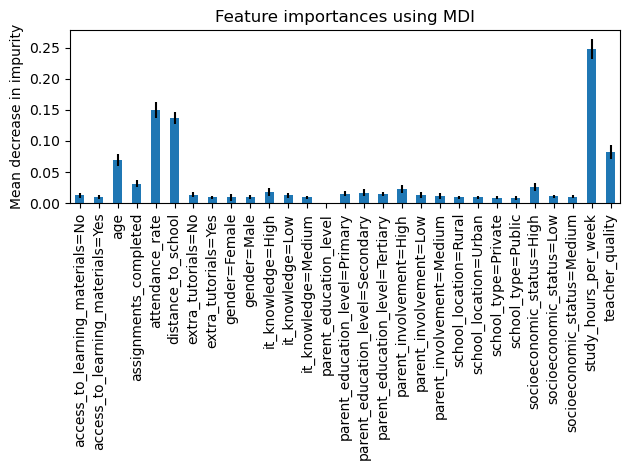

In [165]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd
feature_names = list(dv.get_feature_names_out())
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

forest_importances.sort_values(ascending=False)

# Answer is `study_hours_per_week`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

```python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1
- Both give equal value

In [167]:
!pip install xgboost

In [168]:
import xgboost as xgb

In [172]:
xgb.train?

Signature:
xgb.train(
    params: Dict[str, Any],
    dtrain: xgboost.core.DMatrix,
    num_boost_round: int = 10,
    *,
    evals: Optional[Sequence[Tuple[xgboost.core.DMatrix, str]]] = None,
    obj: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[numpy.ndarray, numpy.ndarray]]] = None,
    feval: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]]] = None,
    maximize: Optional[bool] = None,
    early_stopping_rounds: Optional[int] = None,
    evals_result: Optional[Dict[str, Dict[str, Union[List[float], List[Tuple[float, float]]]]]] = None,
    verbose_eval: Union[bool, int, NoneType] = True,
    xgb_model: Union[str, os.PathLike, xgboost.core.Booster, bytearray, NoneType] = None,
    callbacks: Optional[Sequence[xgboost.callback.TrainingCallback]] = None,
    custom_metric: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]]] = None,
) -> xgboost.core.Booster
Docstring:
Train a booster with given parameters.

Paramet

In [221]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient="records")
X_train = dv.fit_transform(dicts)

val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

feature_names=list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(X_train, y_train, feature_names=feature_names)
dval = xgb.DMatrix(X_val, y_val, feature_names=feature_names)

def train_xgb(dtrain, dval, evals_result, eta=0.3, num_boost_round=100):
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }

    watchlist = [(dtrain, "train"), (dval, "val")]

    model = xgb.train(
        xgb_params, 
        dtrain, 
        evals=watchlist, 
        evals_result=evals_result,
        num_boost_round=num_boost_round,
        verbose_eval=False
    )
    return model

In [254]:
def get_xgb_best_rmse(dtrain, dval, eta):
    evals_result = {}
    model = train_xgb(dtrain=dtrain, dval=dval, evals_result=evals_result, eta=eta)    

    df_score = pd.DataFrame()
    df_score["train"] = evals_result["train"]["rmse"]
    df_score["val"] = evals_result["val"]["rmse"]

    idx_min = df_score["val"].idxmin()
    min_rmse = df_score.iloc[idx_min]["val"].round(3)    

    mean_rmse = df_score["val"].mean().round(3)    

    y_pred = model.predict(dval)
    best_rmse = round(root_mean_squared_error(y_val, y_pred), 3)    

    return min_rmse, mean_rmse, best_rmse

min_rmse, mean_rmse, best_rmse = get_xgb_best_rmse(dtrain, dval, 0.3)
print(f"Eta: 0.3, rmse: min {min_rmse}, mean {mean_rmse}, best: {best_rmse}")

min_rmse, mean_rmse, best_rmse = get_xgb_best_rmse(dtrain, dval, 0.1)
print(f"Eta: 0.1, rmse: min {min_rmse}, mean {mean_rmse}, best: {best_rmse}")

Min rmse 40.439 for eta: 0.3
Mean rmse 42.294 for eta: 0.3
Best rmse 43.419 for eta: 0.3
Eta: 0.3, rmse: min 40.439, mean 42.294, best: 43.419
Min rmse 40.073 for eta: 0.1
Mean rmse 40.812 for eta: 0.1
Best rmse 41.05 for eta: 0.1
Eta: 0.1, rmse: min 40.073, mean 40.812, best: 41.05


Min rmse 40.073 for eta: 0.1
Mean rmse 40.812 for eta: 0.1
Best rmse 41.05 for eta: 0.1
Min rmse 40.439 for eta: 0.3
Mean rmse 42.294 for eta: 0.3
Best rmse 43.419 for eta: 0.3


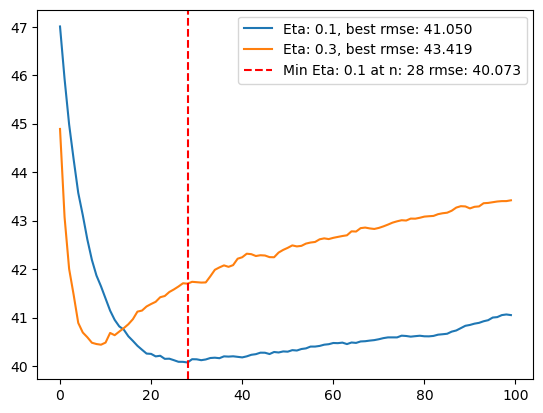

In [258]:
idx_min_final = None
rmse_min_final = None
eta_min_final = None

for eta in [0.1, 0.3]:
    evals_result = {}
    model = train_xgb(dtrain=dtrain, dval=dval, evals_result=evals_result, eta=eta)
    df_score = pd.DataFrame()
    df_score["train"] = evals_result["train"]["rmse"]
    df_score["val"] = evals_result["val"]["rmse"]

    idx_min = df_score["val"].idxmin()
    rmse_min = df_score.iloc[idx_min]["val"].round(3)
    print(f"Min rmse {rmse_min} for eta: {eta}")

    mean_rmse = df_score["val"].mean().round(3)
    print(f"Mean rmse {mean_rmse} for eta: {eta}")

    y_pred = model.predict(dval)
    best_rmse = round(root_mean_squared_error(y_val, y_pred), 3)
    print(f"Best rmse {best_rmse} for eta: {eta}")

    if rmse_min_final is None or rmse_min < rmse_min_final:
        idx_min_final = idx_min
        rmse_min_final = rmse_min
        eta_min_final = eta    
    plt.plot(df_score.index, df_score.val, label=f"Eta: {eta}, best rmse: {best_rmse:.3f}")

plt.axvline(
    x=idx_min_final,
    color="red",
    linestyle="--",
    label=f"Min Eta: {eta_min_final} at n: {idx_min_final} rmse: {rmse_min_final}",
)

plt.legend()

# The answer is `0.1`